# EM-algorithm for k-means clustering

### Imports

In [1]:
import EM
import helpers
import datasets
import numpy as np
from sklearn.cluster import KMeans

train_features_1, test_features_1, train_labels_1, test_labels_1 = datasets.sklearn_digits()
train_features_2, test_features_2, train_labels_2, test_labels_2 = datasets.sklearn_digits_summarized()

## Own EM-clustering routine

In [2]:
clf = EM.GaussianEM(threshold=3e-4)

In [3]:
clf.fit(train_features_1)

1257it [02:14,  9.31it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.14it/s]
1it [00:00,  9.43it/s]

Iteration 1: convergence_level: 0.32209915772013414


1257it [02:14,  9.37it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.77it/s]
1it [00:00,  9.17it/s]

Iteration 2: convergence_level: 0.28443602668845774


1257it [02:13,  9.39it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.72it/s]
1it [00:00,  9.26it/s]

Iteration 3: convergence_level: 0.07857121123671838


1257it [02:11,  9.54it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.76it/s]
1it [00:00,  9.52it/s]

Iteration 4: convergence_level: 0.06018644384843594


1257it [02:11,  9.56it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.83it/s]
1it [00:00,  9.17it/s]

Iteration 5: convergence_level: 0.05347879665194438


1257it [02:16,  9.18it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.81it/s]
1it [00:00,  9.26it/s]

Iteration 6: convergence_level: 0.036589467284631416


1257it [02:14,  9.32it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.89it/s]
1it [00:00,  8.70it/s]

Iteration 7: convergence_level: 0.019299687161093444


1257it [02:12,  9.46it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.79it/s]
1it [00:00,  8.70it/s]

Iteration 8: convergence_level: 0.010088039884509813


1257it [02:12,  9.45it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.85it/s]

Iteration 9: convergence_level: 0.0002688055424888952


### Predict cluster assignments using estimated EM parameters

In [4]:
predicted = clf.predict(train_features_1)

### Visualize cluster centroids

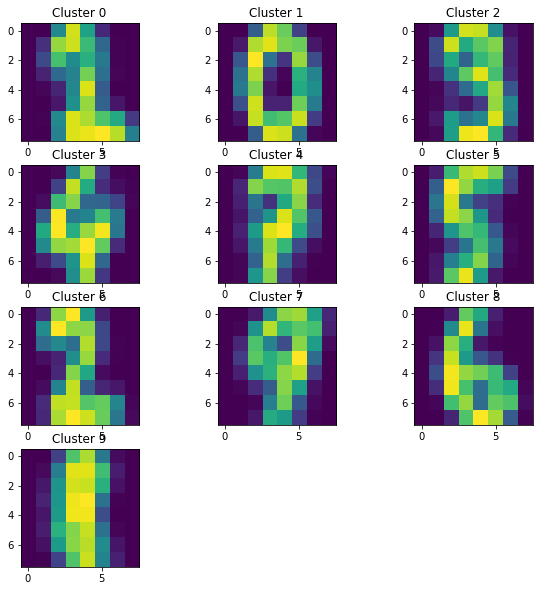

In [5]:
clf.plot_clusters()

### Transform labels

In [6]:
pred_labels = clf.transform_labels(predicted, [8, 0, 3, 4, 7, 5, 2, 9, 6, 1])

### Print scores

In [7]:
helpers.unsupervised_scores(train_labels_1, predicted)

Completeness score: 0.7051369171880397
Homogeneity score: 0.678891627922515
Adjusted mutual info score 0.6872082563563033


## Scikit-learns's k-means

In [8]:
cluster = KMeans(n_clusters=10)

In [9]:
model = cluster.fit(train_features_1, train_labels_1)

In [10]:
clusters_pred = model.fit(train_features_1).labels_

In [11]:
helpers.unsupervised_scores(train_labels_1, clusters_pred)

Completeness score: 0.7708488314080398
Homogeneity score: 0.7528057964834264
Adjusted mutual info score 0.758228135908439


## Comparing algorithms

### Print scores

In [12]:
helpers.unsupervised_scores(clusters_pred, predicted)

Completeness score: 0.8124834962303813
Homogeneity score: 0.8009913246203905
Adjusted mutual info score 0.8037937772787889
